In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist

In [5]:
#dimension of the encoded image
encoding_dim=64

In [7]:
#read the input image after flattenning it from 28x28 to 1d array of 784 pixels
input_img=Input(shape=(784,))

#compress to a dense fully connected layer using relu activation
encoded=Dense(encoding_dim,activation='relu')(input_img)
#reconstruct the image to its 1d representatino using sigmoid
decoded=Dense(784,activation='sigmoid')(encoded)

#map image to its flattened rpresentation
autoencoder=Model(input_img,decoded)

#map image to its encoded representation
encoder=Model(input_img,encoded)

#layer to match encoded representattion 
encoded_input=Input(shape=(encoding_dim,))

In [8]:
#get the decoder layer from autoencoder
decoded_layer=autoencoder.layers[-1]

In [9]:
#map inut to reconstructed image
decoder=Model(encoded_input,decoded_layer(encoded_input))

In [13]:
#compile the model
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
#load dataset

#since input and output are the same replace y with a placeholder
(X_train,_),(X_test,_)=mnist.load_data()

#normalize data between 0 and 1
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

#flatten the image into 1D array of 784 pixels
X_train=X_train.reshape((len(X_train),(np.prod(X_train.shape[1:]))))
X_test=X_test.reshape((len(X_test),(np.prod(X_test.shape[1:]))))

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [16]:
#model fitting
autoencoder.fit(X_train,X_train,epochs=25,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.3483 - val_loss: 0.1616
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1524 - val_loss: 0.1256
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.1220 - val_loss: 0.1077
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.1057 - val_loss: 0.0960
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0952 - val_loss: 0.0887
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0885 - val_loss: 0.0839
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0840 - val_loss: 0.0807
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0809 - val_loss: 0.0785
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0787 - val_loss: 0.0771
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0777 - val_loss: 0.0761
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0766 - val_loss: 0.0753
Epoch 12/25
235/235 ━━━━━━━━━━━━━━

In [17]:
#encode decode test set
encoded_imgs=encoder.predict(X_test)
decoded_imgs=decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


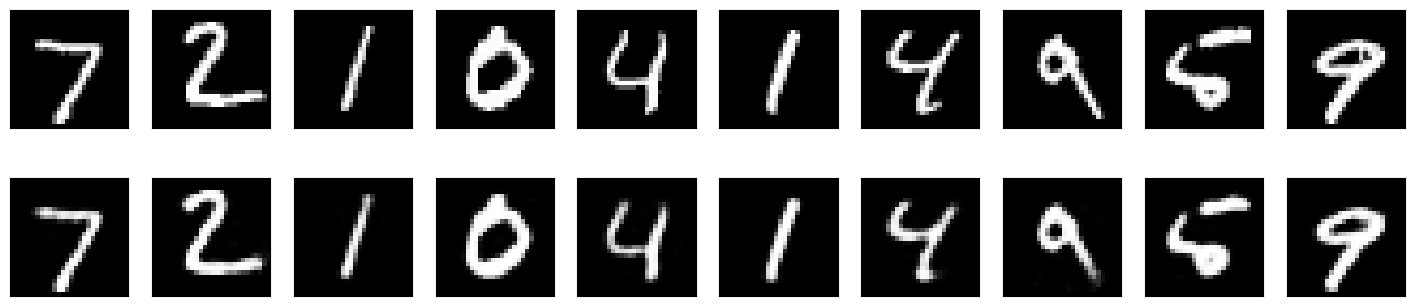

In [18]:
n=10
plt.figure(figsize=(18,4))

for i in range(n):
    #original images
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #images to compare with the original
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [19]:
np.array_equal(X_test[0],decoded_imgs[0])

False